## PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU

In [85]:
#read data
import pandas as pd

X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv')

In [86]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   int64  
 5   NCP                             2111 non-null   int64  
 6   SCC                             2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   int64  
 9   family_history_with_overweight  2111 non-null   int64  
 10  FAF                             2111 non-null   int64  
 11  TUE                             2111 non-null   int64  
 12  Gender_Male                     21

In [87]:
# Phân tích thống kê dữ liệu
print(X.describe())

               Age       Height       Weight         FAVC         FCVC  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     0.883941   457.986736   
std       6.345968     0.093305    26.191172     0.320371   295.226514   
min      14.000000     1.450000    39.000000     0.000000     0.000000   
25%      19.947192     1.630000    65.473343     1.000000   170.000000   
50%      22.777890     1.700499    83.000000     1.000000   421.000000   
75%      26.000000     1.768464   107.430682     1.000000   809.000000   
max      61.000000     1.980000   173.000000     1.000000   809.000000   

               NCP          SCC        SMOKE         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean    388.715775     0.045476     0.020843   601.051161   
std     179.959492     0.208395     0.142893   391.006783   
min       0.000000     0.000000     0.000000     0.000000   
25%     325.500000     0.000

### Chuẩn hóa dữ liệu

In [88]:
 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

        Age    Height    Weight      FAVC      FCVC       NCP       SCC  \
0 -0.522124 -0.875589 -0.862558 -2.759769 -0.975708  0.490695 -0.218272   
1 -0.522124 -1.947599 -1.168077 -2.759769  1.189244  0.490695  4.581439   
2 -0.206889  1.054029 -0.366090 -2.759769 -0.975708  0.490695 -0.218272   
3  0.423582  1.054029  0.015808 -2.759769  1.189244  0.490695 -0.218272   
4 -0.364507  0.839627  0.122740 -2.759769 -0.975708 -2.160530 -0.218272   

      SMOKE      CH2O  family_history_with_overweight  ...  CAEC_Frequently  \
0 -0.145900 -0.133152                        0.472291  ...        -0.359835   
1  6.853997  1.703568                        0.472291  ...        -0.359835   
2 -0.145900 -0.133152                        0.472291  ...        -0.359835   
3 -0.145900 -0.133152                       -2.117337  ...        -0.359835   
4 -0.145900 -0.133152                       -2.117337  ...        -0.359835   

   CAEC_Sometimes   CAEC_no  CALC_Frequently  CALC_Sometimes   CALC_no  \


### Giảm chiều dữ liệu với PCA

Phương sai được giải thích bởi mỗi thành phần chính:
[1.37857345e-01 9.20705618e-02 8.19397447e-02 7.52435634e-02
 6.10856652e-02 5.48579334e-02 5.32509379e-02 4.96328103e-02
 4.49540361e-02 4.33954942e-02 4.05843547e-02 3.84351076e-02
 3.57332112e-02 3.44118250e-02 3.35639416e-02 2.93007136e-02
 2.61202972e-02 2.55571189e-02 1.66824865e-02 1.25997916e-02
 8.81417561e-03 3.86600141e-03 4.28833063e-05]


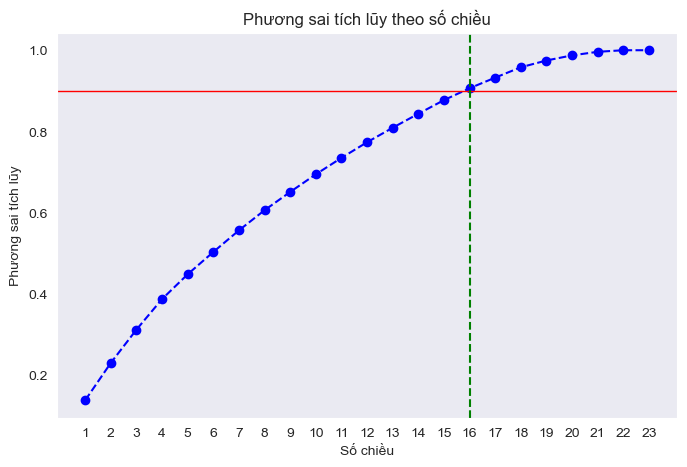

Số chiều tối ưu là 16 để giữ lại 90.0% phương sai


In [89]:
# Import thư viện
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Thực hiện PCA
pca = PCA(n_components=scaled_df.shape[1])  # Số thành phần tối đa bằng số chiều dữ liệu
principal_components = pca.fit_transform(scaled_df)

# Tính phương sai 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Hiển thị kết quả
print("Phương sai được giải thích bởi mỗi thành phần chính:")
print(explained_variance_ratio)

# Biểu đồ phương sai tích lũy 
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-', label='90%', linewidth=1)
plt.axvline(x=np.argmax(cumulative_variance >= 0.90) + 1, color='g', linestyle='--')
plt.title('Phương sai tích lũy theo số chiều')
plt.xlabel('Số chiều')
plt.ylabel('Phương sai tích lũy')
plt.xticks(range(1, len(cumulative_variance) + 1))

plt.grid()
plt.savefig('Img\\Cumulative_Explained_Variance.png')
plt.show()

threshold = 0.90  # Mức độ phương sai cần giữ lại
optimal_components = np.argmax(cumulative_variance >= threshold) + 1  # +1 vì chỉ số bắt đầu từ 0
print(f"Số chiều tối ưu là {optimal_components} để giữ lại {threshold * 100}% phương sai")

Phương sai giải thích của 16 thành phần chính: [0.13785734 0.09207056 0.08193974 0.07524356 0.06108567 0.05485793
 0.05325094 0.04963281 0.04495404 0.04339549 0.04058435 0.03843511
 0.03573321 0.03441183 0.03356394 0.02930071]


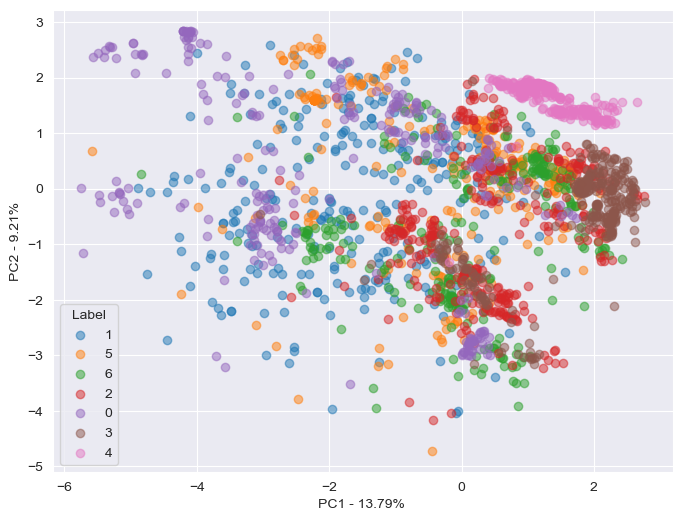

In [90]:
# trực quan hóa dữ liệu với 16 thành phần chính
pca_16 = PCA(n_components=optimal_components)
principal_components_16 = pca_16.fit_transform(scaled_df)

explained_variance_16 = pca_16.explained_variance_ratio_
print("Phương sai giải thích của 16 thành phần chính:", explained_variance_16)

# Chuyển kết quả thành DataFrame
pca_df_16 = pd.DataFrame(data=principal_components_16, columns=[f'PC{i}' for i in range(1, 17)])
pca_df_16['label'] = y

# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
for label in pca_df_16['label'].unique():
    plt.scatter(pca_df_16.loc[pca_df_16['label'] == label, 'PC1'], pca_df_16.loc[pca_df_16['label'] == label, 'PC2'], alpha=0.5, label=label)
    
plt.xlabel('PC1 - {:.2f}% '.format(explained_variance_16[0] * 100))
plt.ylabel('PC2 - {:.2f}%'.format(explained_variance_16[1] * 100))
plt.legend(title='Label')
plt.savefig('Img\\PCA_16D_Label.png')
plt.show()

### Giảm chiều dữ liệu với UMAP


In [91]:
!pip install umap-learn

Số chiều tối ưu dựa trên PCA: 16


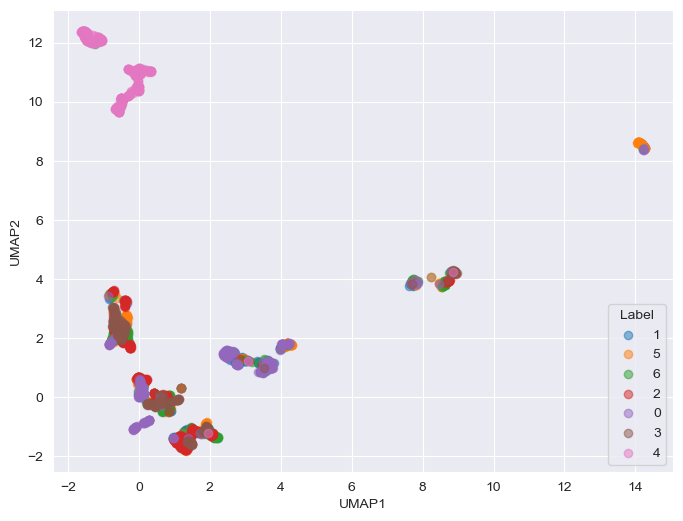

In [92]:
# Sử dụng PCA để tìm số chiều tối ưu dựa trên phương sai tích lũy. Sau đó áp dụng UMAP để giảm chiều.

# Số chiều tối ưu dựa trên PCA
import umap.umap_ as umap_learn  # Thư viện chuẩn của umap-learn

optimal_components_pca = optimal_components # 16 thành phần chính

print(f"Số chiều tối ưu dựa trên PCA: {optimal_components_pca}")

# Ap dụng UMAP với số chiều tối ưu
reducer = umap_learn.UMAP(n_components=optimal_components_pca)
X_reduced_umap = reducer.fit_transform(X_scaled)

# Trực quan hóa dữ liệu
umap_df = pd.DataFrame(data=X_reduced_umap, columns=[f'UMAP{i}' for i in range(1, optimal_components_pca + 1)])
umap_df['label'] = y

plt.figure(figsize=(8, 6))
for label in umap_df['label'].unique():
    plt.scatter(umap_df.loc[umap_df['label'] == label, 'UMAP1'], umap_df.loc[umap_df['label'] == label, 'UMAP2'], alpha=0.5, label=label)
    
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label')
plt.savefig('Img\\UMAP_Label.png')
plt.show()

In [100]:
X_reduced_umap.shape

(2111, 16)

C:\Users\buian\anaconda3\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\buian\anaconda3\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\buian\anaconda3\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\buian\anaconda3\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Số chiều tối ưu dựa trên Trustworthiness score: 16


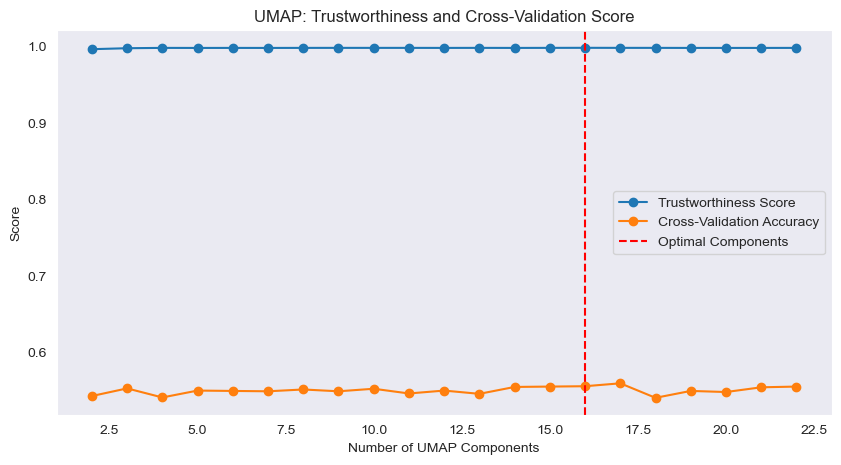

In [95]:
# Import thư viện
import umap.umap_ as umap_learn  # Thư viện chuẩn của umap-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import trustworthiness
from sklearn.neighbors import KNeighborsClassifier as KNN

# Thử nghiệm UMAP với các số chiều khác nhau
n_components_list = range(2, scaled_df.shape[1])
trustworthiness_scores = []
cv_scores = []

for n in n_components_list:
    # Giảm chiều với UMAP
    reducer = umap_learn.UMAP(n_components=n)
    X_reduced = reducer.fit_transform(X)
    
    # Tính Trustworthiness score
    score = trustworthiness(X, X_reduced)
    trustworthiness_scores.append(score)
    
    # Đánh giá mô hình học máy (KNN) với cross-validation
    model = KNN(n_neighbors=5)
    cv_score = np.mean(cross_val_score(model, X_reduced, y, cv=5))
    cv_scores.append(cv_score)

# Hiển thị số chiều tối ưu dựa trên Trustworthiness score
optimal_components_umap = n_components_list[np.argmax(trustworthiness_scores)]
print(f"Số chiều tối ưu dựa trên Trustworthiness score: {optimal_components_umap}")
# Vẽ biểu đồ Trustworthiness và CV Score 
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, trustworthiness_scores, label="Trustworthiness Score", marker='o')
plt.plot(n_components_list, cv_scores, label="Cross-Validation Accuracy", marker='o')
plt.axvline(x=optimal_components_umap, color='r', linestyle='--', label='Optimal Components')
plt.xlabel('Number of UMAP Components')
plt.ylabel('Score')
plt.title('UMAP: Trustworthiness and Cross-Validation Score')
plt.legend()
plt.grid()
plt.show()

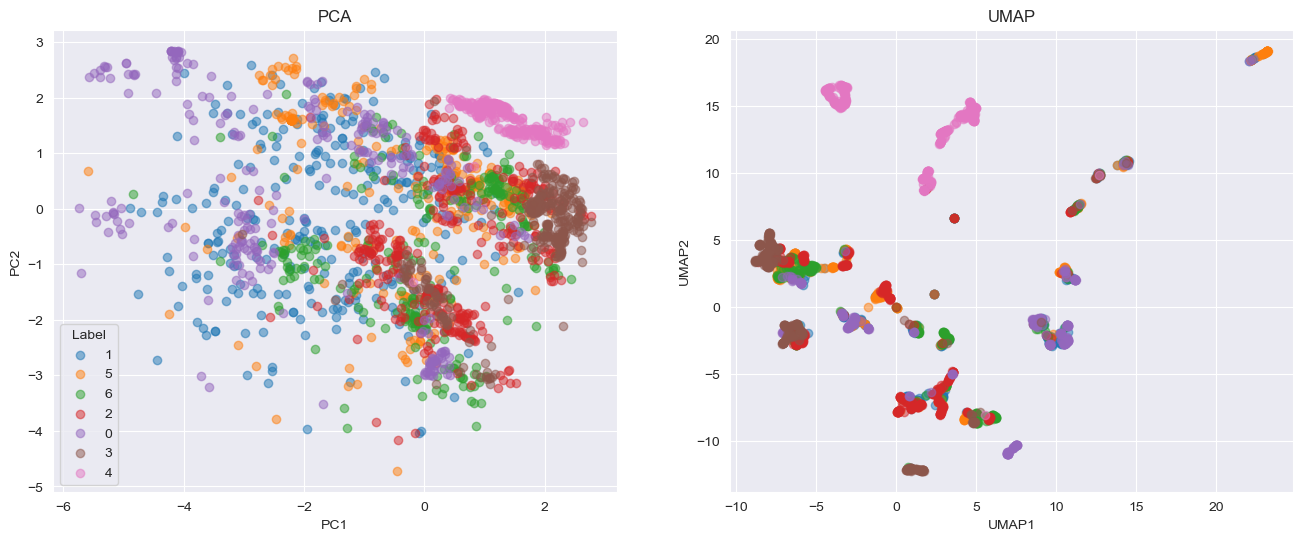

In [98]:
# so sanh giữa PCA và UMAP với 2 chiều 

# Giảm chiều dữ liệu với PCA
pca_2 = PCA(n_components=2)
principal_components_2 = pca_2.fit_transform(scaled_df)

# Giảm chiều dữ liệu với UMAP
reducer = umap_learn.UMAP(n_components=2)
X_reduced_umap_2 = reducer.fit_transform(X_scaled)

# Trực quan hóa dữ liệu
pca_df_2 = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2'])
pca_df_2['label'] = y

umap_df_2 = pd.DataFrame(data=X_reduced_umap_2, columns=['UMAP1', 'UMAP2'])
umap_df_2['label'] = y

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for label in pca_df_2['label'].unique():
    axes[0].scatter(pca_df_2.loc[pca_df_2['label'] == label, 'PC1'], pca_df_2.loc[pca_df_2['label'] == label, 'PC2'], alpha=0.5, label=label)
    axes[1].scatter(umap_df_2.loc[umap_df_2['label'] == label, 'UMAP1'], umap_df_2.loc[umap_df_2['label'] == label, 'UMAP2'], alpha=0.5, label=label)
    
axes[0].set_title('PCA')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(title='Label')

axes[1].set_title('UMAP')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')

plt.savefig('Img\\PCA_UMAP_2D_Label.png')
plt.show()

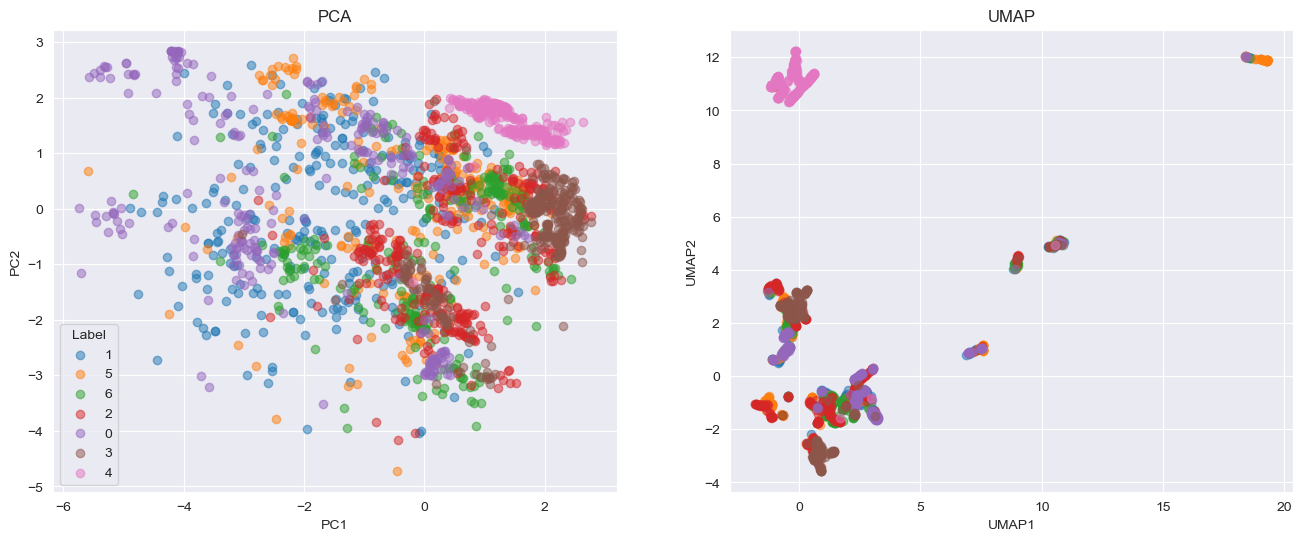

In [99]:
# so sanh giữa PCA và UMAP với giảm 6 chiều

# Giảm chiều dữ liệu với PCA
pca_6 = PCA(n_components=6)
principal_components_6 = pca_6.fit_transform(scaled_df)

# Giảm chiều dữ liệu với UMAP
reducer = umap_learn.UMAP(n_components=6)
X_reduced_umap_6 = reducer.fit_transform(X_scaled)

# Trực quan hóa dữ liệu
pca_df_6 = pd.DataFrame(data=principal_components_6, columns=[f'PC{i}' for i in range(1, 7)])
pca_df_6['label'] = y

umap_df_6 = pd.DataFrame(data=X_reduced_umap_6, columns=[f'UMAP{i}' for i in range(1, 7)])
umap_df_6['label'] = y

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for label in pca_df_6['label'].unique():
    axes[0].scatter(pca_df_6.loc[pca_df_6['label'] == label, 'PC1'], pca_df_6.loc[pca_df_6['label'] == label, 'PC2'], alpha=0.5, label=label)
    axes[1].scatter(umap_df_6.loc[umap_df_6['label'] == label, 'UMAP1'], umap_df_6.loc[umap_df_6['label'] == label, 'UMAP2'], alpha=0.5, label=label)
    
axes[0].set_title('PCA')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(title='Label')

axes[1].set_title('UMAP')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')

plt.savefig('Img\\PCA_UMAP_6D_Label.png')
plt.show()
